In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris  
from sklearn.model_selection import train_test_split

df = pd.read_csv(r'D:\Workspace\Dataset\master_Mechanical_only2IMU5ModesProcessed.csv')
arr = df.values
columns = len(arr[:,1])
rows = len(arr[1,:])
print(rows, columns)
X = arr[:,:73]
y = arr[:,-1]
yint = y.astype(int)
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

73 12910


In [10]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_val_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
y_test_pred = clf.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
dt_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Validation Accuracy: {accuracy: .2f}")
print("Mean Absolute Error (MAE):", mae)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Test Accuracy: {dt_accuracy:.2f}")

Validation Accuracy:  1.00
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.00
R-squared (R2): 1.00
Test Accuracy: 1.00


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
r2 = r2_score(y_test, y_pred)
lr_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print("Mean Absolute Error (MAE):", mae)
print(f"R-squared (R2): {r2:.2f}")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f"Test Accuracy: {lr_accuracy:.2f}")

Mean Absolute Error (MAE): 5.0074669357964275e-15
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 5.0074669357964275e-15
R-squared (R2): 1.00
Coefficients: [ 1.26592819e-14 -1.34755488e-15 -6.32003130e-15  2.91953961e-15
 -4.16507107e-15 -4.15639745e-15 -2.15105711e-16 -2.77555756e-17
  6.93889390e-17  2.60208521e-17 -6.93889390e-18 -1.44849410e-16
 -6.26105071e-15 -1.61291336e-15  7.32053307e-16  4.58292258e-15
  9.22505277e-16 -7.82837337e-15 -6.93889390e-18  3.46944695e-18
  2.08166817e-17  6.93889390e-18  0.00000000e+00  3.46944695e-18
 -3.07154475e-16 -2.52857631e-15  2.33320308e-15 -1.93237353e-15
  3.84154514e-15 -4.74663711e-15 -6.07153217e-18 -2.60208521e-18
 -4.33680869e-18 -8.23993651e-17  2.55871713e-17 -1.32272665e-17
 -1.15650219e-14  3.84013567e-15  6.25251261e-15 -1.29817489e-14
  2.95149647e-15 -4.10102182e-15 -2.23779328e-16  1.49836740e-16
 -2.60208521e-16  1.70002901e-16  1.07552856e-16  7.84095011e-16
 -3.67089172e-15  1.82471226e-15 -2.84950015e-15  1.39

In [6]:
from sklearn.neighbors import KNeighborsClassifier
odd_numbers = [number for number in range(3, 13) if number % 2 != 0]

for n in odd_numbers:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    if accuracy == 1:
        print(f"n_neighbors={n}: Validation Accuracy: {accuracy:.2f\n}")
        break
    print(f"n_neighbors={n}: Validation Accuracy: {accuracy:.2f}\n")
   
del y_test_pred
y_test_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print(f"Test Accuracy: {knn_accuracy:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
knn_accuracy = 0.36

n_neighbors=3: Validation Accuracy: 0.89

n_neighbors=5: Validation Accuracy: 0.89

n_neighbors=7: Validation Accuracy: 0.89

n_neighbors=9: Validation Accuracy: 0.88

n_neighbors=11: Validation Accuracy: 0.88

Mean Absolute Error (MAE): 5.0074669357964275e-15
Test Accuracy: 0.88
Mean Squared Error (MSE): 0.00
R-squared (R2): 1.00


In [7]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale') 
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
svm_accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print(f"Accuracy: {svm_accuracy:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 0.2601961796592669
Accuracy: 0.88
Mean Squared Error (MSE): 0.65
R-squared (R2): 0.56


In [8]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 0.010841507485802787
Accuracy: 1.00
Mean Squared Error (MSE): 0.03
R-squared (R2): 0.98


In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
lda_accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print(f'Accuracy: {lda_accuracy:.2f}')
print(f"Mean Squared Error (MSE): {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 0.0
Accuracy: 1.00
Mean Squared Error (MSE): 0.00
R-squared (R2): 1.00


In [16]:
import xgboost as xgb
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_val_test, y_train, y_val_test = train_test_split(X, yint, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

clf = xgb.XGBClassifier(
    objective="multi:softmax",  # Use softmax for multiclass classification
    num_class=len(np.unique(yint)),  # Number of classes in your target variable
    learning_rate=0.01,
    max_depth=3,
    n_estimators=100,
    random_state=42
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2:.2f}")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print(f"Accuracy: {accuracy:.2f}")


report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:\n", report)


# param_grid = {
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators': [100, 200, 300],
# }

# grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, scoring='accuracy', cv=5)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# best_estimator = grid_search.best_estimator_
# y_pred_tuned = best_estimator.predict(X_test)

# mse = mean_squared_error(y_test, y_pred_tuned)
# r2 = r2_score(y_test, y_pred_tuned)
# accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
# print(f'Tuned Model Accuracy: {accuracy_tuned:.2f}')
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(f"R-squared (R2): {r2:.2f}")

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5], got [1 2 3 4 5 6]

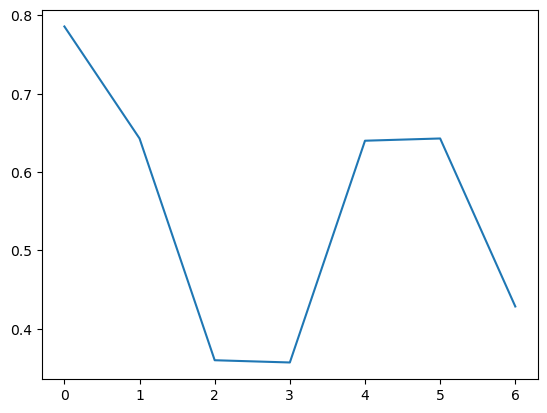

In [29]:
performance = [dt_accuracy, lda_accuracy, knn_accuracy, lr_accuracy, xgb_accuracy, rf_accuracy, svm_accuracy]
plt.plot(performance)

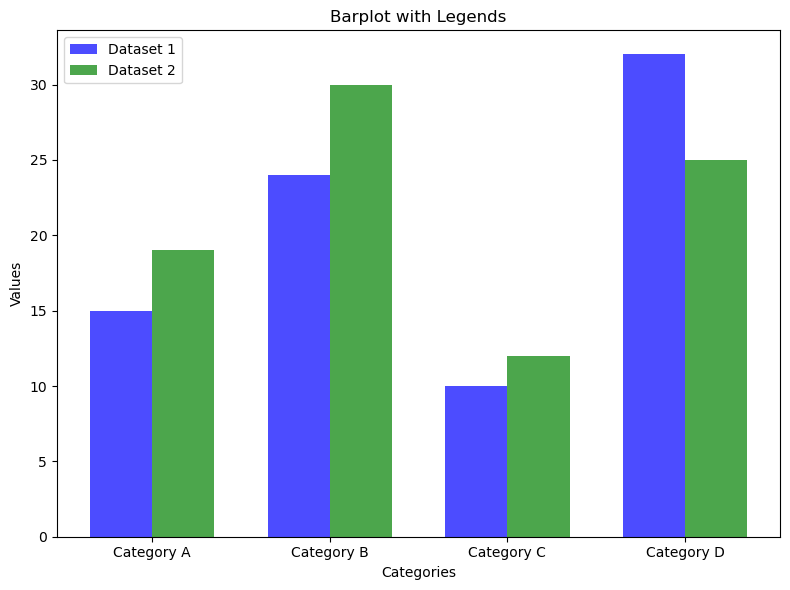

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['Category A', 'Category B', 'Category C', 'Category D']
values_1 = [15, 24, 10, 32]
values_2 = [19, 30, 12, 25]

# Create barplot
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
bar_width = 0.35
index = np.arange(len(categories))

# Create bars for two datasets
bars1 = plt.bar(index, values_1, bar_width, label='Dataset 1', color='b', alpha=0.7)
bars2 = plt.bar(index + bar_width, values_2, bar_width, label='Dataset 2', color='g', alpha=0.7)

# Add labels, title, and x-axis ticks
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Barplot with Legends')
plt.xticks(index + bar_width / 2, categories)

# Add legends
plt.legend()

# Display the plot
plt.tight_layout()  # Optional: Adjust layout to prevent clipping of labels
plt.show()
